<a href="https://colab.research.google.com/github/vichidamba/maksimus_emotion-recognition/blob/main/Face-emotion/FER_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install FER

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 812 kB 4.0 MB/s 
     |████████████████████████████████| 2.3 MB 15.8 MB/s 


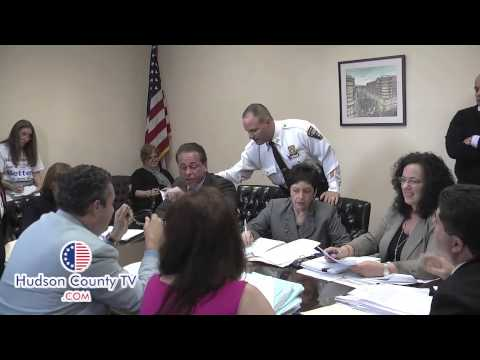

In [ ]:
!pip install -q youtube-dl
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'EPfvLKPW3ro'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# # cut the first 5 seconds
# !ffmpeg -y -loglevel info -i youtube.mp4 -ss 00:02:05 -to 00:02:50 video.mp4
# !ffmpeg -y -loglevel info -i youtube.mp4  video.mp4
# # clear any previous outputs.
# !rm -rf processed
# # detect poses on the these 10 seconds.
# !./OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
# # convert the result into MP4
# !ffmpeg -y -loglevel info -i processed/video.avi output.mp4

[youtube] EPfvLKPW3ro: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 35.71MiB in 00:00


In [ ]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

In [ ]:

# Put in the location of the video file that has to be processed
location_videofile = "/content/youtube.mp4"

# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=True)



INFO:fer:29.97 fps, 13956 frames, 465.67 seconds
INFO:fer:Making directories at output
100%|██████████| 13956/13956 [2:32:08<00:00,  1.53frames/s]
INFO:fer:Completed analysis: saved to output/youtube_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 0%
INFO:fer:Compressing: 0%
INFO:fer:Compressing: 1%
INFO:fer:Compressing: 1%
INFO:fer:Compressing: 1%
INFO:fer:Compressing: 2%
INFO:fer:Compressing: 2%
INFO:fer:Compressing: 2%
INFO:fer:Compressing: 3%
INFO:fer:Compressing: 3%
INFO:fer:Compressing: 3%
INFO:fer:Compressing: 4%
INFO:fer:Compressing: 4%
INFO:fer:Compressing: 5%
INFO:fer:Compressing: 5%
INFO:fer:Compressing: 5%
INFO:fer:Compressing: 6%
INFO:fer:Compressing: 6%
INFO:fer:Compressing: 6%
INFO:fer:Compressing: 7%
INFO:fer:Compressing: 7%
INFO:fer:Compressing: 7%
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 9%
INFO:fer:Compressing: 9%
INFO:fer:Compressing: 10%
INFO:fer:Compressing: 10%
INFO:fer:Compressing: 10%
INFO:fer:Co

In [ ]:
from fer import FER
import cv2

img= cv2.imread("DMUbjq2UjJcG3umGv3Qjjd.jpeg")
detector = FER()
result= detector.detect_emotions(img)

[{'box': array([284, 172, 230, 230], dtype=int32),
  'emotions': {'angry': 1.0,
   'disgust': 0.0,
   'fear': 0.0,
   'happy': 0.0,
   'neutral': 0.0,
   'sad': 0.0,
   'surprise': 0.0}}]

In [ ]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)


In [ ]:
vid_df

box  angry  disgust  fear  happy   sad  surprise  \
0      [348, 176, 39, 49]   0.59     0.03  0.03   0.03  0.24      0.06   
1      [348, 177, 39, 49]   0.53     0.02  0.05   0.05  0.31      0.01   
2      [347, 175, 40, 51]   0.31     0.01  0.05   0.03  0.50      0.01   
3      [347, 176, 40, 51]   0.19     0.00  0.08   0.03  0.46      0.00   
4      [347, 175, 40, 52]   0.11     0.00  0.06   0.02  0.30      0.00   
...                   ...    ...      ...   ...    ...   ...       ...   
13805  [601, 162, 48, 68]   0.07     0.00  0.02   0.20  0.43      0.00   
13806  [600, 162, 49, 68]   0.07     0.00  0.02   0.20  0.48      0.00   
13807   [801, 23, 42, 54]   0.02     0.00  0.01   0.84  0.04      0.02   
13808   [797, 27, 42, 51]   0.03     0.00  0.00   0.86  0.02      0.02   
13809  [599, 164, 48, 67]   0.05     0.00  0.01   0.67  0.11      0.00   

       neutral  
0         0.01  
1         0.02  
2         0.10  
3         0.23  
4         0.51  
...        ...  
13805     0.27  
13806     0.23  
13807     0.08  
13808     0.08  
13809     0.16  

[13810 rows x 8 columns]

In [ ]:
vid_df.to_json(orient='index')

'{"0":{"box":[348,176,39,49],"angry":0.59,"disgust":0.03,"fear":0.03,"happy":0.03,"sad":0.24,"surprise":0.06,"neutral":0.01},"1":{"box":[348,177,39,49],"angry":0.53,"disgust":0.02,"fear":0.05,"happy":0.05,"sad":0.31,"surprise":0.01,"neutral":0.02},"2":{"box":[347,175,40,51],"angry":0.31,"disgust":0.01,"fear":0.05,"happy":0.03,"sad":0.5,"surprise":0.01,"neutral":0.1},"3":{"box":[347,176,40,51],"angry":0.19,"disgust":0.0,"fear":0.08,"happy":0.03,"sad":0.46,"surprise":0.0,"neutral":0.23},"4":{"box":[347,175,40,52],"angry":0.11,"disgust":0.0,"fear":0.06,"happy":0.02,"sad":0.3,"surprise":0.0,"neutral":0.51},"5":{"box":[347,175,41,53],"angry":0.12,"disgust":0.0,"fear":0.07,"happy":0.02,"sad":0.17,"surprise":0.0,"neutral":0.62},"6":{"box":[348,176,39,52],"angry":0.27,"disgust":0.0,"fear":0.06,"happy":0.02,"sad":0.17,"surprise":0.0,"neutral":0.47},"7":{"box":[709,1,41,50],"angry":0.06,"disgust":0.0,"fear":0.06,"happy":0.07,"sad":0.68,"surprise":0.0,"neutral":0.13},"8":{"box":[348,176,40,51],"a

In [ ]:
vid_df2 = input_video.get_first_face(vid_df)


In [ ]:
vid_df2

box  angry  disgust  fear  happy   sad  surprise  \
0      [348, 176, 39, 49]   0.59     0.03  0.03   0.03  0.24      0.06   
1      [348, 177, 39, 49]   0.53     0.02  0.05   0.05  0.31      0.01   
2      [347, 175, 40, 51]   0.31     0.01  0.05   0.03  0.50      0.01   
3      [347, 176, 40, 51]   0.19     0.00  0.08   0.03  0.46      0.00   
4      [347, 175, 40, 52]   0.11     0.00  0.06   0.02  0.30      0.00   
...                   ...    ...      ...   ...    ...   ...       ...   
13805  [601, 162, 48, 68]   0.07     0.00  0.02   0.20  0.43      0.00   
13806  [600, 162, 49, 68]   0.07     0.00  0.02   0.20  0.48      0.00   
13807   [801, 23, 42, 54]   0.02     0.00  0.01   0.84  0.04      0.02   
13808   [797, 27, 42, 51]   0.03     0.00  0.00   0.86  0.02      0.02   
13809  [599, 164, 48, 67]   0.05     0.00  0.01   0.67  0.11      0.00   

       neutral  
0         0.01  
1         0.02  
2         0.10  
3         0.23  
4         0.51  
...        ...  
13805     0.27  
13806     0.23  
13807     0.08  
13808     0.08  
13809     0.16  

[13810 rows x 8 columns]

In [ ]:
vid_df3 = input_video.get_emotions(vid_df2)




In [ ]:
vid_df3

angry  disgust  fear  happy   sad  surprise  neutral
0       0.59     0.03  0.03   0.03  0.24      0.06     0.01
1       0.53     0.02  0.05   0.05  0.31      0.01     0.02
2       0.31     0.01  0.05   0.03  0.50      0.01     0.10
3       0.19     0.00  0.08   0.03  0.46      0.00     0.23
4       0.11     0.00  0.06   0.02  0.30      0.00     0.51
...      ...      ...   ...    ...   ...       ...      ...
13805   0.07     0.00  0.02   0.20  0.43      0.00     0.27
13806   0.07     0.00  0.02   0.20  0.48      0.00     0.23
13807   0.02     0.00  0.01   0.84  0.04      0.02     0.08
13808   0.03     0.00  0.00   0.86  0.02      0.02     0.08
13809   0.05     0.00  0.01   0.67  0.11      0.00     0.16

[13810 rows x 7 columns]

Human Emotions  Emotion Value from the Video
0          Angry                       3361.06
1        Disgust                         15.28
2           Fear                       1082.91
3          Happy                       1171.04
4            Sad                       2981.69
5       Surprise                        167.50
6        Neutral                       5009.77

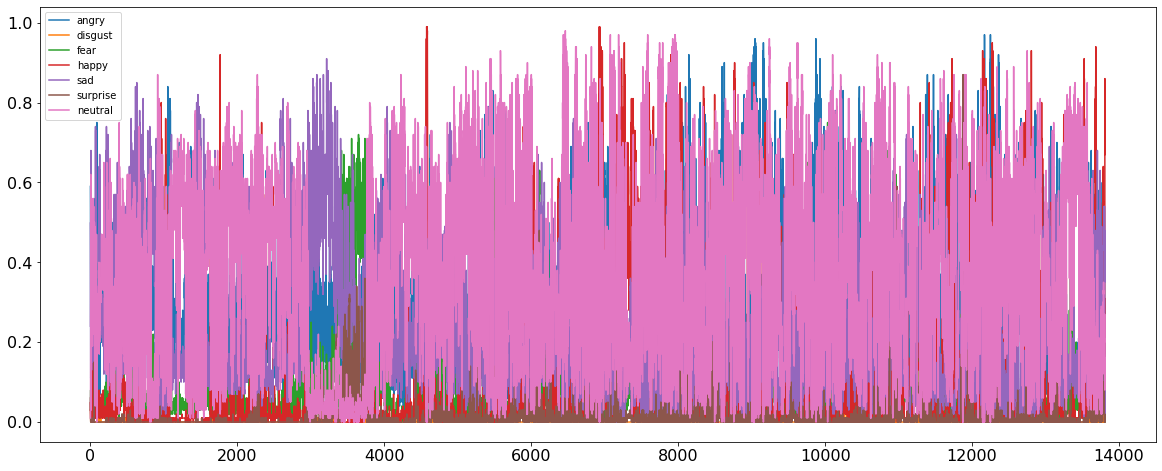

In [ ]:
# Plotting the emotions against time in the video
pltfig = vid_df3.plot(figsize=(20, 8), fontsize=16).get_figure()


# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df3.angry)
disgust = sum(vid_df3.disgust)
fear = sum(vid_df3.fear)
happy = sum(vid_df3.happy)
sad = sum(vid_df3.sad)
surprise = sum(vid_df3.surprise)
neutral = sum(vid_df3.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

In [ ]:
X=vid_df3

In [ ]:
Y=X.drop(['neutral'], axis = 1)

In [ ]:
Y

angry  disgust  fear  happy   sad  surprise
0       0.59     0.03  0.03   0.03  0.24      0.06
1       0.53     0.02  0.05   0.05  0.31      0.01
2       0.31     0.01  0.05   0.03  0.50      0.01
3       0.19     0.00  0.08   0.03  0.46      0.00
4       0.11     0.00  0.06   0.02  0.30      0.00
...      ...      ...   ...    ...   ...       ...
13805   0.07     0.00  0.02   0.20  0.43      0.00
13806   0.07     0.00  0.02   0.20  0.48      0.00
13807   0.02     0.00  0.01   0.84  0.04      0.02
13808   0.03     0.00  0.00   0.86  0.02      0.02
13809   0.05     0.00  0.01   0.67  0.11      0.00

[13810 rows x 6 columns]

In [ ]:
Z=Y

In [ ]:
Z

angry  disgust  fear  happy   sad  surprise
0       0.59     0.03  0.03   0.03  0.24      0.06
1       0.53     0.02  0.05   0.05  0.31      0.01
2       0.31     0.01  0.05   0.03  0.50      0.01
3       0.19     0.00  0.08   0.03  0.46      0.00
4       0.11     0.00  0.06   0.02  0.30      0.00
...      ...      ...   ...    ...   ...       ...
13805   0.07     0.00  0.02   0.20  0.43      0.00
13806   0.07     0.00  0.02   0.20  0.48      0.00
13807   0.02     0.00  0.01   0.84  0.04      0.02
13808   0.03     0.00  0.00   0.86  0.02      0.02
13809   0.05     0.00  0.01   0.67  0.11      0.00

[13810 rows x 6 columns]

In [ ]:
cols = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']
Z[cols] = Z[cols].replace({'0':np.nan, 0:np.nan})


In [ ]:
Z

angry  disgust  fear  happy   sad  surprise
0       0.59     0.03  0.03   0.03  0.24      0.06
1       0.53     0.02  0.05   0.05  0.31      0.01
2       0.31     0.01  0.05   0.03  0.50      0.01
3       0.19      NaN  0.08   0.03  0.46       NaN
4       0.11      NaN  0.06   0.02  0.30       NaN
...      ...      ...   ...    ...   ...       ...
13805   0.07      NaN  0.02   0.20  0.43       NaN
13806   0.07      NaN  0.02   0.20  0.48       NaN
13807   0.02      NaN  0.01   0.84  0.04      0.02
13808   0.03      NaN   NaN   0.86  0.02      0.02
13809   0.05      NaN  0.01   0.67  0.11       NaN

[13810 rows x 6 columns]

In [ ]:
! pip install mpld3
import mpld3
from mpld3 import plugins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pltfig = Z.plot(figsize=(20, 8), fontsize=16).get_figure()
mpld3.display()


In [ ]:
new_df4 = pd.DataFrame(np.where(Z.T == Z.T.max(),Z.T, 0),index=Z.columns).T
new_df4

angry  disgust  fear  happy   sad  surprise
0       0.59      0.0   0.0   0.00  0.00       0.0
1       0.53      0.0   0.0   0.00  0.00       0.0
2       0.00      0.0   0.0   0.00  0.50       0.0
3       0.00      0.0   0.0   0.00  0.46       0.0
4       0.00      0.0   0.0   0.00  0.30       0.0
...      ...      ...   ...    ...   ...       ...
13805   0.00      0.0   0.0   0.00  0.43       0.0
13806   0.00      0.0   0.0   0.00  0.48       0.0
13807   0.00      0.0   0.0   0.84  0.00       0.0
13808   0.00      0.0   0.0   0.86  0.00       0.0
13809   0.00      0.0   0.0   0.67  0.00       0.0

[13810 rows x 6 columns]

In [ ]:
cols = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']
new_df4[cols] = new_df4[cols].replace({'0':np.nan, 0:np.nan})

In [ ]:
new_df4

angry  disgust  fear  happy   sad  surprise
0       0.59      NaN   NaN    NaN   NaN       NaN
1       0.53      NaN   NaN    NaN   NaN       NaN
2        NaN      NaN   NaN    NaN  0.50       NaN
3        NaN      NaN   NaN    NaN  0.46       NaN
4        NaN      NaN   NaN    NaN  0.30       NaN
...      ...      ...   ...    ...   ...       ...
13805    NaN      NaN   NaN    NaN  0.43       NaN
13806    NaN      NaN   NaN    NaN  0.48       NaN
13807    NaN      NaN   NaN   0.84   NaN       NaN
13808    NaN      NaN   NaN   0.86   NaN       NaN
13809    NaN      NaN   NaN   0.67   NaN       NaN

[13810 rows x 6 columns]

In [ ]:
pltfig = new_df4.plot(figsize=(20, 8), fontsize=16).get_figure()
mpld3.display()

In [ ]:
import numpy as np

In [ ]:
new_df = pd.DataFrame(np.where(Y.T == Y.T.max(),Y.T, 0),index=Y.columns).T
new_df

angry  disgust  fear  happy   sad  surprise
0       0.59      0.0   0.0   0.00  0.00       0.0
1       0.53      0.0   0.0   0.00  0.00       0.0
2       0.00      0.0   0.0   0.00  0.50       0.0
3       0.00      0.0   0.0   0.00  0.46       0.0
4       0.00      0.0   0.0   0.00  0.30       0.0
...      ...      ...   ...    ...   ...       ...
13805   0.00      0.0   0.0   0.00  0.43       0.0
13806   0.00      0.0   0.0   0.00  0.48       0.0
13807   0.00      0.0   0.0   0.84  0.00       0.0
13808   0.00      0.0   0.0   0.86  0.00       0.0
13809   0.00      0.0   0.0   0.67  0.00       0.0

[13810 rows x 6 columns]

In [ ]:
! pip install mpld3
import mpld3
from mpld3 import plugins
pltfig = new_df.plot(figsize=(20, 8), fontsize=16).get_figure()
mpld3.display()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pltfig = vid_df3.plot(figsize=(20, 8), fontsize=16).get_figure()
mpld3.display()